Team Jedward Datathon project!

In [148]:
#import values
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [117]:
#importing csv files to dataframes
customers_df = pd.read_csv("the_data\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("the_data\olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("the_data\olist_order_items_dataset.csv")
order_payment_df = pd.read_csv("the_data\olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("the_data\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("the_data\olist_orders_dataset.csv")
products_df = pd.read_csv("the_data\olist_products_dataset.csv")
sellers_df = pd.read_csv("the_data\olist_sellers_dataset.csv")

In [118]:
duplicate_customer_df = pd.DataFrame
duplicate_customer_df = customers_df[customers_df.duplicated(subset=['customer_unique_id'], keep=False)]
duplicate_customer_df = duplicate_customer_df.sort_values(by='customer_unique_id', ascending=False)
duplicate_customer_csv_data = duplicate_customer_df.to_csv('cleaned_data/duplicate_customer_dataset.csv', index = False)
duplicate_customer_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12133,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
...,...,...,...,...,...
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


In [119]:
geolocation_df = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
geolocation_csv_data = geolocation_df.to_csv('cleaned_data/geolocation_dataset_cleaned.csv', index = False)

In [120]:
print(order_items_df.isnull().sum())
print(order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


In [121]:
print(order_payment_df.isnull().sum())
print(order_payment_df.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
0


In [23]:
order_reviews_df = order_reviews_df.fillna(0)

print(order_reviews_df.isnull().sum())
print(order_reviews_df.duplicated().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
0


In [46]:
orders_df = orders_df.fillna(0)
print(orders_df.isnull().sum())
print(orders_df.duplicated(subset=['order_id']).sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
0


In [125]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('misc')
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
print(sellers_df.isnull().sum())
print(sellers_df.duplicated(subset=['seller_id']).sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
0


In [164]:
final_df = pd.merge(duplicate_customer_df, orders_df[['customer_id', 'order_id']], on = "customer_id", how = "outer")

final_df.dropna()

asd = final_df.to_csv('cleaned_data/bruh1.csv', index = False)

final_df = pd.merge(final_df, order_items_df[['order_id', 'product_id', 'price']], on ="order_id", how = "outer")

final_df = pd.merge(final_df, products_df[['product_id', 'product_category_name', 'product_photos_qty']], on ="product_id", how = "inner")

final_df.dropna()

final_df = pd.merge(final_df, order_reviews_df[['order_id', 'review_score', 'review_comment_message']], on ="order_id", how = "outer")

final_df['review_score'] = final_df['review_score'].fillna(final_df['review_score'].mean())

final_df['review_comment_message'] = final_df['review_comment_message'].fillna(0)

final_df = final_df.dropna() 

final_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,price,product_category_name,product_photos_qty,review_score,review_comment_message
0,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,ebe76afae9242fc70b0b807b78f17adb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,baratheon e uma das melhores lojas.
1,f8ead8fa77e496442ea34c58340a7f5a,c6df3869c263531ebd51f0454a353605,96020.0,pelotas,RS,99ed5bfea4c7e7191a2412698fc7abbb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,0
2,d102ebbcb63b6d1806d5482c59d732d4,374fcbbfcf189ae177b2f955f9e74b3d,18275.0,tatui,SP,6b1d0be1d67ed935bcaab8aa908f2b3e,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,Valeu a pena a compra. Fica muito bonito na cama
14,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,39a0e2f723def2e12a51e963006c9242,18fc07433ae4bcd5a8bdf658b2c6e40d,37.18,cama_mesa_banho,1.0,1.0,Meu produto não certo. Insatisfeita\r\n
15,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340.0,barra bonita,SP,fd216c435fda2be27c92920a5e5dba82,fd3a4121e687a6b84e7af92606d5d718,24.90,fashion_bolsas_e_acessorios,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48733,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595.0,brasilia,DF,cea3e6c11eb60acb9d8d4d51694832f8,f89cd865cac300a9bf1320dd8f0fa223,11.55,eletronicos,1.0,4.0,0
48747,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731.0,salvador,BA,2cfc79d9582e9135c0a9b61fa60e6b21,6bd248f93425ceeb625a8a97e2404112,59.90,papelaria,1.0,1.0,0
48769,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055.0,maceio,AL,90ae229a4addcfead792e2564554f09c,b0961721fd839e9982420e807758a2a6,59.90,ferramentas_jardim,2.0,1.0,Infelizmente o produto ainda não chegou. Houve...
48881,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220.0,nova iguacu,RJ,08204559bebd39e09ee52dcb56d8faa2,a2bd2eae20998a24c22b110334928b02,87.90,malas_acessorios,1.0,5.0,"Maravilhoso,amei e chegou antes do prazo !"


In [189]:
order_reviews_clean_df = pd.DataFrame()
order_reviews_clean_df['review_score'] = order_reviews_df['review_score'].fillna(order_reviews_df['review_score'].mean())
order_reviews_clean_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna(0)

order_reviews_clean_df[['review_score', 'review_comment_message']]

l = []
for i in order_reviews_clean_df['review_comment_message']:
    if i != 0:
        l.append(i)

order_reviews_clean_df[['review_score', 'review_comment_message']]

l



['Recebi bem antes do prazo estipulado.',
 'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa',
 'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho',
 'Mas um pouco ,travando...pelo valor ta Boa.\r\n',
 'Vendedor confiável, produto ok e entrega antes do prazo.',
 'GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU',
 'Péssimo',
 'Loja nota 10',
 'obrigado pela atençao amim dispensada',
 'A compra foi realizada facilmente.\r\nA entrega foi efetuada muito antes do prazo dado.\r\nO produto já começou a ser usado e até o presente,\r\nsem problemas.',
 'relógio muito bonito e barato.',
 'Não gostei ! Comprei gato por lebre',
 'Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o p

In [165]:
final_df['product_category_name'].shape

(8135,)

cama_mesa_banho                                  1243
moveis_decoracao                                  898
esporte_lazer                                     740
beleza_saude                                      619
informatica_acessorios                            614
                                                 ... 
portateis_casa_forno_e_cafe                         1
fashion_roupa_infanto_juvenil                       1
artigos_de_festas                                   1
portateis_cozinha_e_preparadores_de_alimentos       1
pc_gamer                                            1
Name: product_category_name, Length: 71, dtype: int64

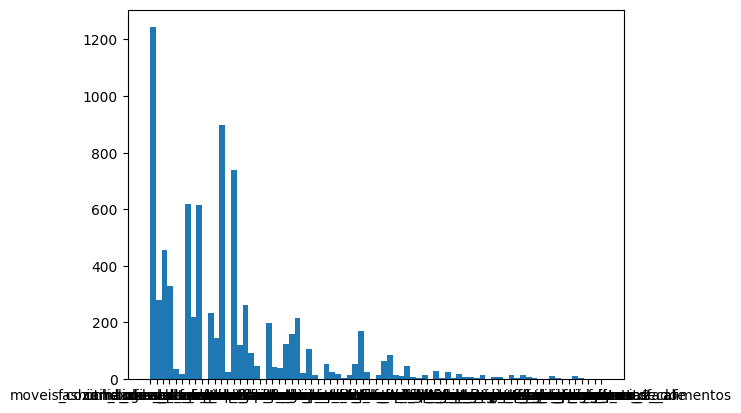

In [167]:
list = []
for i in final_df['product_category_name']:
    if i != 0:
        list.append(i)
plt.hist(list, bins = 78)
plt.show

final_df['product_category_name'].value_counts()


"""
cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
"""